<table class="m01-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/yy/netsci-course/blob/master/m03-smallworld/shortest_path_length_distribution.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a href="https://github.com/yy/netsci-course/blob/master/m03-smallworld/shortest_path_length_distribution.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on Github</a>
  </td>
</table>

# Module 3 Assignment

Let's calculate and see the distribution of the path lengths of a graph. First we will generate a random graph which we will use for the assignment.

In [2]:
# Use this random seed for submission.
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


random.seed(42)        
np.random.seed(42)

random_graph = nx.erdos_renyi_graph(1200, 0.008, seed=42)
print(nx.info(random_graph))

Graph with 1200 nodes and 5769 edges


## Let's write a function to calculate shortest path lengths

**Q**: Given a graph and a source node, we can perform the BFS to calculate all shortest paths from the source to all other nodes in the graph. Can you write this function? We are assuming that the network is undirected and unweighted. Test your function with very small examples. 

If you really can't do it, just use Networkx's [shortest path length function](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path_length.html#networkx.algorithms.shortest_paths.generic.shortest_path_length). 



In [4]:
#with networkx's function
shortPathLength = nx.shortest_path_length(random_graph)
shortPathLength=dict(shortPathLength)
print(shortPathLength[3][14])

3


In [5]:
# Your code here
def shortest_path_lengths(G, source):
  """
  computes the shortest path between every pair of node from the source in the graph,
  and calculates the length of the shortest path.
  Returns a dictionary with path length as value
  """
  l = {}
  for end in range(len(G.nodes())):
    l[(end)] = len(nx.shortest_path(G,source, end)) - 1
  return l



In [6]:
# The following should be satisfied if the path lengths are calculated correctly. 
G = nx.Graph()
G.add_edges_from([(0, 1), (0,2), (1, 3), (3, 4), (1,4)])
assert shortest_path_lengths(G, 0) == {0: 0, 1: 1, 2: 1, 3: 2, 4: 2} 


**Q**: Next, write a function that converts the results into a [`counter`](https://docs.python.org/3/library/collections.html#collections.Counter). For instance, if the result of `shortest_path_lengths()` was `{0: 0, 1: 1, 2: 1, 3: 2, 4: 2}`, then this function will convert this result and return `Counter({0: 1, 1: 2, 2: 2})` because there was one node (`0`) with distance 0, two nodes (`1` and `2`) with distance 1, and two nodes (`3` and `4`) with dstance 2. 

In [7]:
# Your code here
from collections import Counter
def count_path_lengths(distances):
  c=Counter()
  for val in distances.values():
    c[val]=list(distances.values()).count(val)
  return c


In [7]:
# this should be satisfied. 
assert count_path_lengths({0: 0, 1: 1, 2: 1, 3: 2, 4: 2}) == Counter({0: 1, 1: 2, 2: 2})

**Q**: Now we can compute the path length distribution across all pairs of nodes in a network.

In [8]:
# Your code here
def shortest_path_length_distribution(mygraph):
  """
  computes the shortest path between every pair of node from the source in the graph,
  and calculates the length of the shortest path.
  Returns a dictionary with path length as value
  """
  l = {}
  for start in range(len(mygraph.nodes())):
    for end in range(start+1, len(mygraph.nodes())):
      l[(start, end)] = len(nx.shortest_path(mygraph,start, end)) - 1
  return l

print(shortest_path_length_distribution(G))
print(count_path_lengths(shortest_path_length_distribution(G)))

{(0, 1): 1, (0, 2): 1, (0, 3): 2, (0, 4): 2, (1, 2): 2, (1, 3): 1, (1, 4): 1, (2, 3): 3, (2, 4): 3, (3, 4): 1}
Counter({1: 5, 2: 3, 3: 2})


## Visualizing the results
**Q**: Now that you have a list of the shortest paths for the graph, make a histogram for it. This can be done with `matploblib`'s [`bar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) function. The following code snippets may be useful. 

In [9]:
a_counter = Counter({0:10, 1:20, 2:10, 3:1})
a_counter.items()

dict_items([(0, 10), (1, 20), (2, 10), (3, 1)])

In [10]:
list(zip(*a_counter.items()))

[(0, 1, 2, 3), (10, 20, 10, 1)]

In [11]:
# Your code here
import matplotlib.pyplot as plt


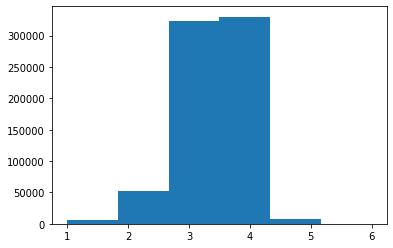

In [12]:
my_path_values = sorted(shortest_path_length_distribution(random_graph).values())
pdf, bins, patch = plt.hist(my_path_values, bins=6)

**Q**: We can now also calculate the average path length of the whole network by averaging the path lengths. 

In [13]:
# Your code here
my_new_path_values=(sorted(shortest_path_length_distribution(G).values()))

In [ ]:

sum(my_new_path_values) / len(my_new_path_values)

1.7

Can you make it as a function? 

In [14]:
# Your code here
def avg_path_length(path_length_counter):
  cnt = 0
  sum = 0
  for val in path_length_counter:
    cnt=cnt+1
    sum = sum+val
  return sum/cnt

print(avg_path_length(my_path_values)) ## for random_graph
print(avg_path_length(my_new_path_values)) ## for G


3.390095913261051
1.7


## How does it scale?

Now go to https://icon.colorado.edu/#!/ and download multiple (at least three) networks that span a range of scale. For instance, pick a couple of networks with ~1000 nodes and then ~10000 nodes, and so on. Be careful with large networks! Calculating shortest paths is an expensive computation and it may take too much time! Stick with not-so-large and not-too-small networks, but do experiment how far you can push. 

**Q**: Using your code above, calculate the average path length of each network. While doing so, also measure how long it takes to compute the result using either `%%time` or `%%timeit` magics. `%%timeit` runs the code multiple times to get a better estimate. So it may not be suitable for large networks. 


In [34]:
slash = open("slash.txt", "rb") # http://snap.stanford.edu/data/soc-Slashdot0811.html
SlashDot = nx.read_edgelist(slash)
slash.close()

In [35]:
print(nx.info(SlashDot))

Graph with 77360 nodes and 546487 edges


In [21]:
asy = open("as1.txt", "rb") # http://snap.stanford.edu/data/as.html
AutoSys =nx.read_edgelist(asy, nodetype=int)
asy.close()

In [22]:
print(nx.info(AutoSys))

Graph with 6474 nodes and 13895 edges


In [37]:
em = open("email.txt", "rb") #http://snap.stanford.edu/data/email-EuAll.html
Email=nx.read_edgelist(em, nodetype=int)
em.close() 

In [38]:
print(nx.info(Email))

Graph with 265214 nodes and 365570 edges


In [28]:
nor = open("net1m.txt", "rb") # http://www.boardsandgender.com/data.php
Norwegian=nx.read_edgelist(nor, nodetype=int)
nor.close()

In [29]:
print(nx.info(Norwegian))

Graph with 1013 nodes and 3189 edges


In [ ]:
%%timeit
sum_value = 0
for i in range(1000000):
    sum_value += i
  

In [24]:
%%time
sum_value = 0
for i in range(1000000):
    sum_value += i


AutoSys_Average_Path_Length=nx.average_shortest_path_length(AutoSys)

CPU times: user 1min 27s, sys: 773 ms, total: 1min 28s
Wall time: 1min 33s


In [26]:
print(AutoSys_Average_Path_Length)

3.7050034741874245


In [ ]:
%%time
sum_value = 0
for i in range(1000000):
    sum_value += i


Email_Average_Path_Length=nx.average_shortest_path_length(Email)

In [52]:
%%time
sum_value = 0
for i in range(1000000):
    sum_value += i


Norwegian_Average_Path_Length=nx.average_shortest_path_length(Norwegian)

NetworkXError: ignored

In [ ]:
for C in (Norwegian.subgraph(c).copy() for c in nx.connected_components(Norwegian)):
    print(nx.average_shortest_path_length(C))

In [ ]:
for C in (SlashDot.subgraph(c).copy() for c in nx.connected_components(SlashDot)):
    print(nx.average_shortest_path_length(C))

**Q**: now make two plots. The first one is about the relationship between the number of nodes in a network and its average path length. Test whether they have a roughly logarithmic relationship $ d \sim \log N$ or not. Also explore how the execution time scales with the number of nodes ($|V|$) & the number of edges ($|E|$). Is it proportional to $|V|\cdot|E|$? 

In [ ]:
# nodes and avg path length
x = [len(SlashDot.nodes), len(Norwegian.nodes), len(AutoSys.nodes), len(Email.nodes)]
y = [nx.average_shortest_path_length(SlashDot), nx.average_shortest_path_length(Norwegian), nx.average_shortest_path_length(AutoSys), nx.average_shortest_path_negth(Email)]

plt.scatter(x,y)
plt.show()

In [ ]:
#time vs nodes and edges

#upperbound for time taken based on trials - was unable to complete due to memory and power issues
times = [88, 800, 1000, 1000]
y = [len(SlashDot.nodes)*SlashDot.number_of_edges(), len(Norwegian.nodes)*Norwegian.number_of_edges(), len(AutoSys.nodes)*Autosys.number_of_edges(), len(Email.nodes)*Email.number_of_edges()]

plt.scatter(times,y)
plt.show()

**Submit both your notebook (.ipynb) and exported (.html) files.**